In [9]:
!pip3 install -r requirements.txt

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [1]:
from glob import glob
from os.path import join as pjoin

import gym
import textworld
import textworld.gym
from textworld import EnvInfos

GAMES_PATH = "sample_games"  # This assumes `sample_games.zip` was first unzipped.
gamefiles = glob(pjoin(GAMES_PATH, "*.ulx"))
print("Found {} games.".format(len(gamefiles)))

Found 10 games.


## Playing a game 

In [11]:
gamefile = gamefiles[9]  # Pick a game.

requested_infos = EnvInfos(description=True, inventory=True, extras=["goal", "walkthrough"])
env_id = textworld.gym.register_games([gamefile], requested_infos)
agent = textworld.agents.HumanAgent()

env = gym.make(env_id)
obs, infos = env.reset()
#game_state = env.reset()

# Since we asked for more infos, let's print them.
print("Walkthrough:", ". ".join(infos["extra.walkthrough"]))
print(infos["extra.goal"])

#env.render()  # Print the initial observation.

print(obs)

score = 0
done = False
while not done:
    command = input('> ')
    ob, score, done, infos = env.step(command)
    #print(ob)
    env.render()
    

Walkthrough: drop yellow potato. prepare meal. eat meal
You open the copy of 'Cooking: A Modern Approach (3rd Ed.)' and start reading:

Recipe #1
---------
Gather all following ingredients and follow the directions to prepare this tasty meal.

Ingredients:
  carrot
  pork chop
  purple potato

Directions:
  chop the carrot
  fry the carrot
  slice the pork chop
  fry the pork chop
  slice the purple potato
  fry the purple potato
  prepare meal




                    ________  ________  __    __  ________        
                   |        \|        \|  \  |  \|        \       
                    \$$$$$$$$| $$$$$$$$| $$  | $$ \$$$$$$$$       
                      | $$   | $$__     \$$\/  $$   | $$          
                      | $$   | $$  \     >$$  $$    | $$          
                      | $$   | $$$$$    /  $$$$\    | $$          
                      | $$   | $$_____ |  $$ \$$\   | $$          
                      | $$   | $$     \| $$  | $$   | $$          
           

KeyboardInterrupt: 

## Visualizing a `TextWorld.Game` object

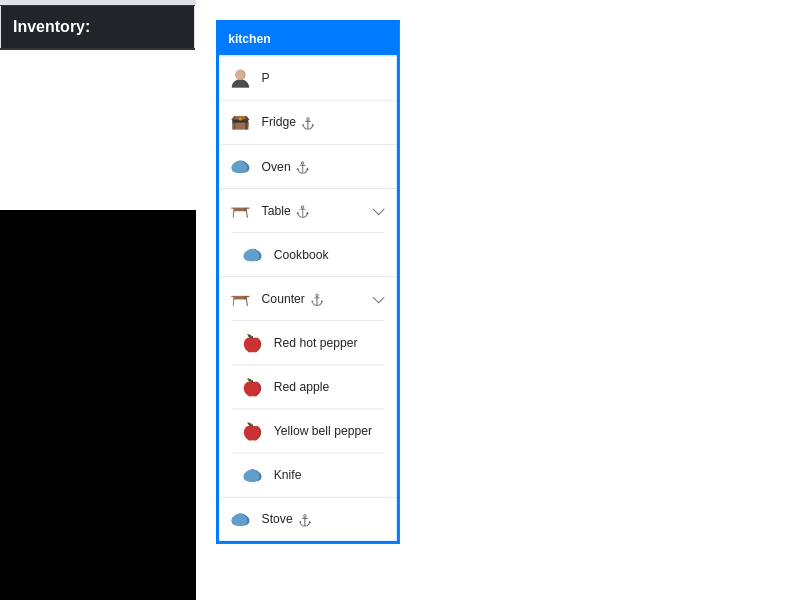

In [14]:
import textworld
gamefile = gamefiles[0]  # Pick a game.
game = textworld.Game.load(gamefile.replace(".ulx", ".json"))
textworld.render.visualize(game)

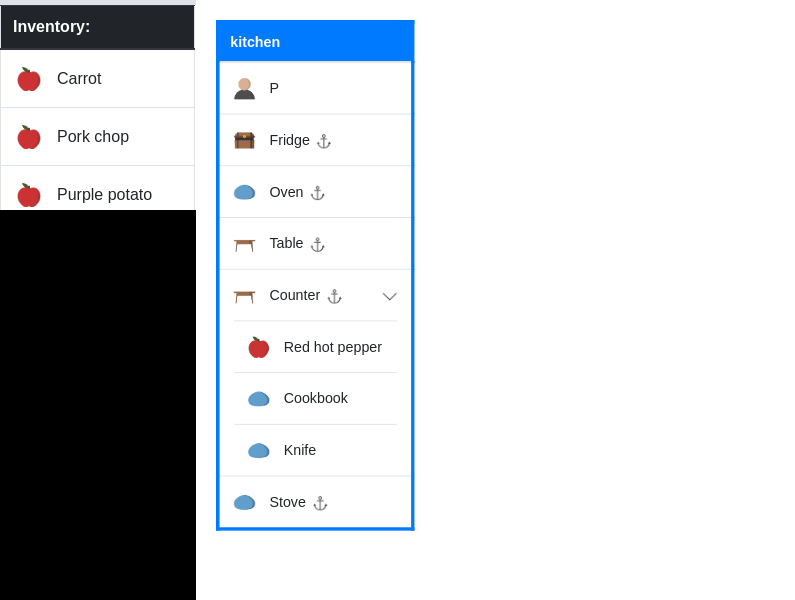

In [4]:
import textworld
gamefile = gamefiles[9]  # Pick a game.
game = textworld.Game.load(gamefile.replace(".ulx", ".json"))
textworld.render.visualize(game)

In [28]:
!python train.py $TRAINING_DATA/*recipe1*.ulx

python: can't open file 'train.py': [Errno 2] No such file or directory


In [16]:
!python test_submission.py sample_submission_random.zip sample_games.zip

Extracting sample_submission_random.zip ...
Running
python3 /TextWorld/notebooks/UoMDiss/starting_kit/ingestion.py /tmp/tmpkua0ekpd sample_games.zip /tmp/tmpkua0ekpd/stats.json
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/site-packages/urllib3/connectionpool.py", line 665, in urlopen
    httplib_response = self._make_request(
  File "/usr/local/lib/python3.8/site-packages/urllib3/connectionpool.py", line 387, in _make_request
    conn.request(method, url, **httplib_request_kw)
  File "/usr/local/lib/python3.8/http/client.py", line 1230, in request
    self._send_request(method, url, body, headers, encode_chunked)
  File "/usr/local/lib/python3.8/http/client.py", line 1276, in _send_request
    self.endheaders(body, encode_chunked=encode_chunked)
  File "/usr/local/lib/python3.8/http/client.py", line 1225, in endheaders
    self._send_output(message_body, encode_chunked=encode_chunked)
  File "/usr/local/lib/python3.8/http/client.py", line 1004, in _send_output
  

In [5]:
!python test_submission.py sample_submission_lstm-dqn.zip sample_games.zip

Extracting sample_submission_lstm-dqn.zip ...
Running
python3 /TextWorld/notebooks/UoMDiss/starting_kit/ingestion.py /tmp/tmpo_nok0fq sample_games.zip /tmp/tmpo_nok0fq/stats.json
Traceback (most recent call last):
  File "/TextWorld/notebooks/UoMDiss/starting_kit/ingestion.py", line 31, in <module>
    AVAILABLE_INFORMATION = textworld.EnvInfos(
  File "/usr/local/lib/python3.8/site-packages/textworld/core.py", line 99, in __init__
    raise ValueError(msg)
ValueError: Unknown information requested: ['has_lost', 'has_won']. Available information are: ['admissible_commands', 'command_templates', 'description', 'entities', 'extras', 'facts', 'game', 'intermediate_reward', 'inventory', 'last_action', 'last_command', 'location', 'lost', 'max_score', 'moves', 'objective', 'policy_commands', 'score', 'verbs', 'won']
Traceback (most recent call last):
  File "test_submission.py", line 66, in <module>
    main()
  File "test_submission.py", line 54, in main
    with open(ingestion_out, 'r') as

In [14]:
!pip install textworld==1.1.1

     |████████████████████████████████| 853 kB 5.3 MB/s eta 0:00:01
     |████████████████████████████████| 634 kB 8.9 MB/s eta 0:00:01
     |████████████████████████████████| 340 kB 9.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.5 MB 5.9 MB/s eta 0:00:01     |██████████████▍                 | 686 kB 5.9 MB/s eta 0:00:01
  ERROR: Command errored out with exit status 1:
   command: /usr/local/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-544d0mzw/textworld/setup.py'"'"'; __file__='"'"'/tmp/pip-install-544d0mzw/textworld/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /tmp/pip-wheel-6_if7g0c
       cwd: /tmp/pip-install-544d0mzw/textworld/
  Complete output (56 lines):
  running bdist_wheel
  running build
  running build_py
  + echo 'Running setup.sh...'
  Running setup.sh...
  ++ uname -s


  Created wheel for urwid: filename=urwid-2.1.2-cp38-cp38-linux_x86_64.whl size=260959 sha256=809cf942c77c4e87958ad3f2bba83666bb36a33ad120abaab44b47342e9dfcc2
  Stored in directory: /root/.cache/pip/wheels/28/71/e4/38b5d81438105d0e3db5016cf2eea6fa796d89d96a04451d4d
  Created wheel for gym: filename=gym-0.10.4-py3-none-any.whl size=1581555 sha256=5d620d32ea27e48d922314bd3d45eb5d72b6918f0c108a83768ae6cc1929760f
  Stored in directory: /root/.cache/pip/wheels/30/a5/99/adcb204fd5063b97a86c5b1e8c6a3a0b2cbdc7ec78838e079d
Successfully built urwid gym
Failed to build textworld
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 3.0.3
    Uninstalling prompt-toolkit-3.0.3:
      Successfully uninstalled prompt-toolkit-3.0.3
  Attempting uninstall: gym
    Found existing installation: gym 0.17.0
    Uninstalling gym-0.17.0:
      Successfully uninstalled gym-0.17.0
  Attempting uninstall: textworld
    Found existing installation: textworld 1.2.0
    Uninstallin